In [125]:
import numpy as np
from doodler import *
import matplotlib.pyplot as plt
from network import *
from dense import Dense
from activation import Activation
from loss import *
from activation_functions import *
from keras.datasets import mnist
from keras.utils import np_utils


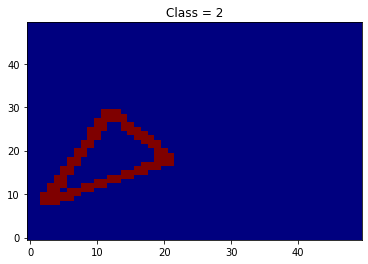

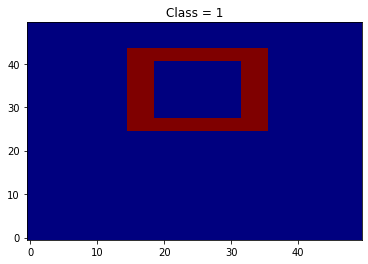

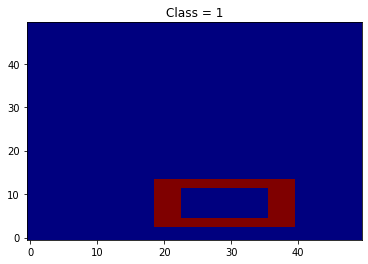

In [126]:
#doodler = Doodler()
im = gen_standard_cases(count=3, types=['ball', 'frame', 'triangle'])

In [127]:
def parse_file(filepath):
    import re
    with open(filepath, 'r') as f:
        data = f.read()

    defaults = {}
    layers = []

    # extract defaults
    defaults_match = re.search(r'DEFAULTS\n(.*?)\nDEFAULTS', data, re.DOTALL)
    if defaults_match:
        defaults_data = defaults_match.group(1)
        defaults_lines = defaults_data.strip().split('\n')
        for line in defaults_lines:
            key, value = line.split(':')
            defaults[key] = value

    # extract layers
    layers_match = re.search(r'LAYERS\n(.*?)\nLAYERS', data, re.DOTALL)
    if layers_match:
        layers_data = layers_match.group(1)
        layers_lines = layers_data.strip().split('\n')
        for line in layers_lines:
            parts = line.split()
            layer_type = parts[0]
            layer_data = {}
            for part in parts[1:]:
                key, value = part.split(':')
                layer_data[key] = value
            layers.append((layer_type, layer_data))

    return defaults, layers

defaults, layers = parse_file('network1.txt')
print(defaults)
print(layers)

{'loss': 'cross_entropy', 'lr': '0.1', 'wlambda': '0.001', 'wrt': 'l2'}
[('dense', {'in': '784', 'out': '200', 'wr': '(0.1,0.1)', 'wrt': 'l2', 'br': '(0.2,0.2)', 'lr': '0.01'}), ('sigmoid', {}), ('dense', {'in': '200', 'out': '20', 'lr': '0.5'}), ('softmax', {})]


In [130]:
import ast
default_loss = defaults['loss']
default_lr = float(defaults['lr'])
default_wlambda = float(defaults['wlambda'])
default_wrt = defaults['wrt']

network = []
wr = None
br = None


for layer in layers:
    if layer[0].lower().capitalize() == 'Dense':
        values = list(layer[1].values())
        keys = list(layer[1].keys())
        in_dim = int(values[0])
        out_dim = int(values[1])
        if 'wr' in keys:
            wr = type(ast.literal_eval(layer[1]['wr'][0]))
            wr = tuple(map(float, wr))
            print(wr)
        if 'br' in keys:
            br = ast.literal_eval(layer[1]['br'])
            br = tuple(map(float, br))
        if 'wrt' in keys:
            wrt = layer[1]['wrt']
        if 'lr' in keys:
            lr = float(layer[1]['lr'])
            print(type(lr))
        network.append(Dense(in_dim, out_dim, wr=wr, br=br, regularization=default_wrt, reg_lambda=default_wlambda, lr=lr))
        

<class 'str'>
None
<class 'float'>


TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
list(layers[0][1].values())

['784', '200', '(0.1,0.1)', 'l2', '(0.2,0.2)', '0.01']